 #    <center><span style="color:#dd0a35">   Les prix des maisons: Techniques de  Regression Avancées  </span> </center>
 > ### Problème: 
 >  Combien coûte une maison? 
 >  Qu'est-ce qui le rend si cher?
 
 <br>



> ### Objectif: 
 >  Il faut prévoir le prix de vente de chaque maison. Pour chaque ID de l'ensemble de tests ainsi que prédire la valeur de la variable SalePrice.
 
<br>


  ###  <span style="color:#1687a7"> TOPICS </span>
---------

    
-  Recuperation et chargement .
- Statistique descriptive .
- Graphiques .
- feature engineering .
- Variables explicatives . 
- Prediction .
- Graphiques evoluees .


------------------------


##  <center> <span style="color:#1687a7"> RECUPERATION ET CHARGEMENT </span> </center>


 ### - Importer les librairies : 

In [137]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

#prep
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV,cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MaxAbsScaler, QuantileTransformer
from sklearn import linear_model
from sklearn import ensemble, tree, preprocessing, svm
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Ridge, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

#validation libraries
from IPython.display import display
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### - Lire les fichiers CSV : 

In [138]:
train_df = pd.read_csv('train.csv') # Donnèes d'entrainemet
df_test = pd.read_csv('test.csv')  # Donnèes de test

----------------------

##  <center> <span style="color:#1687a7"> STATISTIQUE DESCRIPTIVE </span> </center>



### - Les  donnees d'entrees : 

In [139]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### - Les  colonnes :  

In [140]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### - Description des donnees : 

In [141]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### - Description de la colonne SalePrice: 

In [142]:
train_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

###  - La moyenne de SalePrice

In [143]:
train_df["SalePrice"].mean() ## max min mediane mode ...

180921.19589041095

### -Nettoyage des données

In [135]:
train_df['Alley'].fillna(0, inplace=True)

In [136]:
train_df.fillna(0, inplace=True) 
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000


--------------------

##  <center> <span style="color:#1687a7"> GRAPHIQUES </span> </center>


###  A-  Nuage de points

> Le nuage de points indique le degré de corrélation entre deux ou plusieurs variables liées. Chaque unité représente un point dans le nuage.
Les deux variables quantitatives sont:  OverallQual, SalePrice.

> OverallQual: les degrès d'évaluation de matérial et de la finition de la maison


Text(0.5, 1.0, 'SalePrince ou YearRemodAdd')

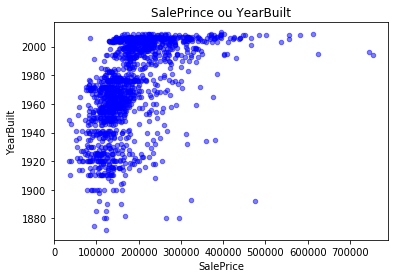

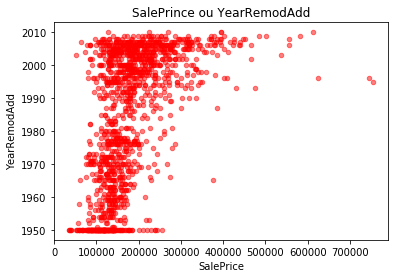

In [144]:
train_df.plot(kind='scatter',x = 'SalePrice', y = 'YearBuilt', alpha=0.5, color='b')
plt.xlabel('SalePrice')
plt.ylabel('YearBuilt')
plt.title('SalePrince ou YearBuilt')
train_df.plot(kind='scatter',x = 'SalePrice', y = 'YearRemodAdd', alpha=0.5, color='r')
plt.xlabel('SalePrice')
plt.ylabel('YearRemodAdd')
plt.title('SalePrince ou YearRemodAdd')

### b- histogramme

> Les vues en grille (subplot) permettent d'organiser les différents tracés à l'intérieur d'une grille d'affichage. Il faut spécifier le nombre de lignes, le nombre de colonnes ainsi que le numéro du tracé. 

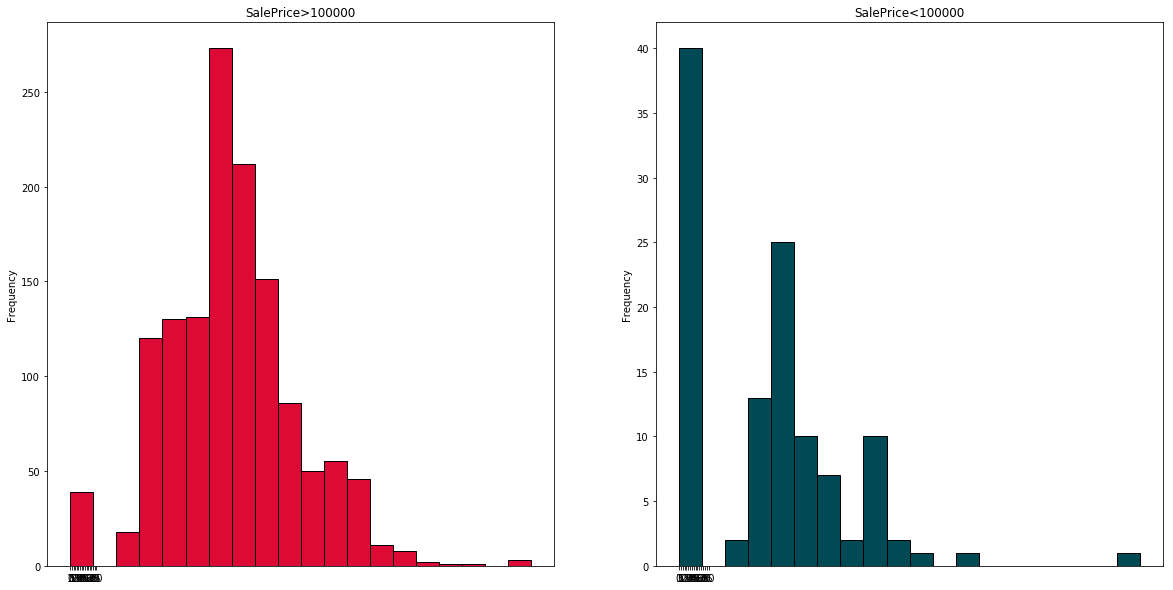

In [145]:
mini_train=train_df[train_df.columns]

f,ax=plt.subplots(1,2,figsize=(20,10))

mini_train[mini_train['SalePrice']>100000].GarageArea.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='#dd0a35')
ax[0].set_title('SalePrice>100000')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
mini_train[mini_train['SalePrice']<100000].GarageArea.plot.hist(ax=ax[1],color='#014955',bins=20,edgecolor='black')
ax[1].set_title('SalePrice<100000')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

### C- Graphique à barres
> Un graphique à barres représente une estimation de la tendance centrale d'une variable numérique avec la hauteur de chaque rectangle et fournit une indication de l'incertitude autour de cette estimation à l'aide de barres d'erreur. Les graphiques à barres comprennent 0 dans la plage de l'axe quantitatif.

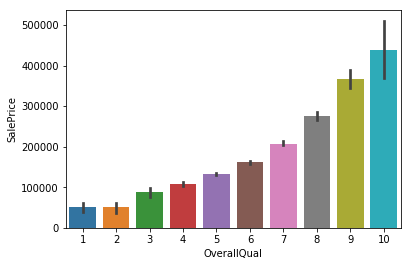

In [146]:
sns.barplot(train_df.OverallQual,train_df.SalePrice)


### D- Kdeplot 
> un graphique qui permet d'ajuster et tracer une estimation de la densité du noyau univariée ou bivariée.
Dans notre cas c'est bivariée parce qu'on a utilisé les différents valeurs de la colonne OverallQual

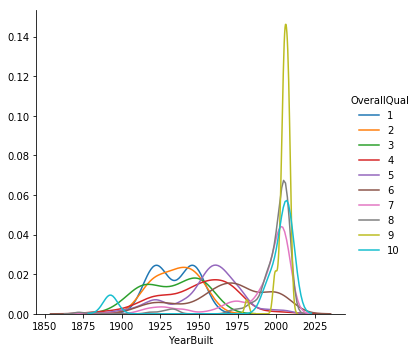

In [147]:
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
sns.FacetGrid(train_df[columns], hue="OverallQual", size=5).map(sns.kdeplot, "YearBuilt").add_legend()
plt.show()

### E- Pivot table

>Un tableau croisé dynamique est un tableau de statistiques qui résume les données d'un tableau plus complet 
Ce résumé peut inclure des sommes, des moyennes ou d’autres statistiques que le tableau croisé dynamique regroupe de manière significative.
Dans notre cas on a utilisé la médiane des prix de ventes par rapport les conditions de ventes. 

> Les tableaux croisés dynamiques sont une technique de traitement de données . Ils permettent à une personne d’organiser et de réorganiser (ou "pivoter") des statistiques afin d’attirer l’attention sur des informations utiles


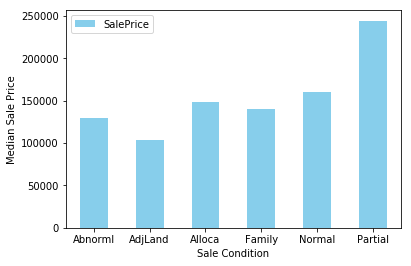

In [148]:
condition_pivot = train_df.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)


condition_pivot.plot(kind='bar', color='skyblue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()


#encoding steps 
def encode_condition(x) : 
    return 1 if x =='Partial' else 0
train_df['enc_condition'] = train_df.SaleCondition.apply(encode_condition)
df_test['enc_condition'] = df_test.SaleCondition.apply(encode_condition)
#def encode(x): return 1 if x == 'Partial' else 0
#train['enc_condition'] = train.SaleCondition.apply(encode)
#test['enc_condition'] = test.SaleCondition.apply(encode)

##  <center> <span style="color:#1687a7"> FEATURE INGENEERING / VARIABLES EXPLICATIVES </span> </center>

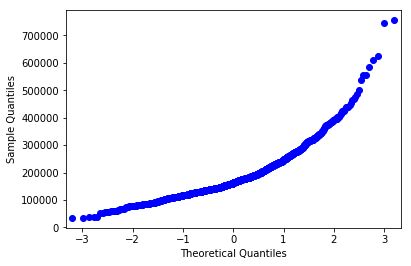

In [149]:
import statsmodels.api as sm
sm.qqplot(train_df["SalePrice"])
plt.show()

> A partir le plot quantile-quantile, on constate que  la distribution des prix de vente est asymétrique à droite et qu'elle ne suit pas une distribution normale. Il faut donc faire des tranformations. (log)

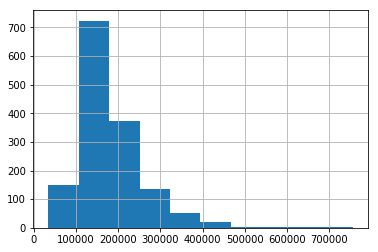

In [150]:
train_df['SalePrice'].hist()

In [151]:
train_df['LogSalePrice'] = np.log(train_df['SalePrice'])
train_df['LogSalePrice'].head(10)


0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
5    11.870600
6    12.634603
7    12.206073
8    11.774520
9    11.678440
Name: LogSalePrice, dtype: float64

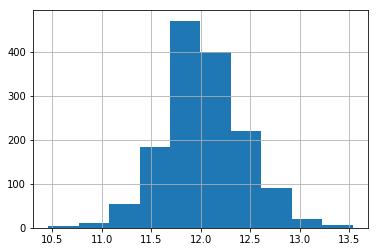

In [152]:
train_df['LogSalePrice'].hist()

 > ### Métrique: 
 > Les soumissions seront évaluées sur l'erreur racine-moyenne-carré--- Mean-Squared-Error(RMSE) entre le logarithme de la valeur prédite et le logarithme du prix de vente observé. (Prendre des logs signifie que les erreurs de prédiction des maisons chères et des maisons mois chéres seront affectées le résultat de manière égale.)

### Modèle de préparation (Fractionnement de DataFrames par colonnes)

In [153]:
#find numeric features 
num_features = train_df.select_dtypes(include=[np.number])
#check data types of these 
num_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
enc_condition      int64
LogSalePrice     float64


In [154]:
#check correlation of numeric variables 
corr = num_features.corr()
#top 5 highly correlated vars 
print(corr['SalePrice'].sort_values(ascending=False)[:5],'\n')
#bottom 5 highly correlated vars 
print(corr['SalePrice'].sort_values(ascending=False)[-5:],'\n')

SalePrice       1.000000
LogSalePrice    0.948374
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 



In [155]:
#interpolate missing values 
dt = train_df.select_dtypes(include=[np.number]).interpolate().dropna()
#check if all cols have zero null values 
sum(dt.isnull().sum()!=0)

0

In [156]:
#change y to natural log 
y = train_df['LogSalePrice']
#dro original dependent var and id 
X = dt.drop(['SalePrice'], axis=1)

>La fonction train_test_split permet de décomposer le jeu de données en 2 groupes: les données pour l'apprentissage et les données pour les tests.

> Le paramètre train_size indique la taille du jeu d'apprentissage qui sera utilisé: 20% des enregistrements.

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)



In [158]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1168, 39) (292, 39) (1168,) (292,)


##  <center> <span style="color:#1687a7"> PREDICTION </span> </center>

### Modélisation - Présentation du modèle linéaire

## la régression linéaire 
> En statistique, la régression linéaire est une approche linéaire permettant de modéliser la relation entre une variable dépendante scalaire y et une ou plusieurs variables explicatives (ou variables indépendantes) notées X. Le cas d'une variable explicative est appelé régression linéaire simple. Pour plus d'une variable explicative, le processus est appelé régression linéaire multiple.

In [159]:
# On crée les échantillons d'entrainements et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#random_state=42

In [160]:
#linear regression 
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [161]:
# méthode pour déterminer la précision de son modèle
lr.score(X_train,y_train)

1.0

In [162]:
lr.score(X_test,y_test)

1.0

In [163]:
#r square 
print("R-Square : " ,model.score(X_test,y_test))

#rmse  L' écart quadratique-moyenne-racine des données de test
preds = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print ('RMSE: ', mean_squared_error(y_test, preds))

R-Square :  1.0
RMSE:  2.539483735985449e-29


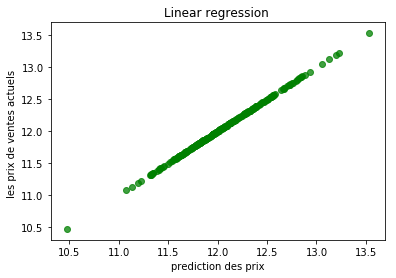

In [164]:
plt.scatter(preds, y_test, alpha=.75, color='g')

plt.xlabel('prediction des prix')
plt.ylabel('les prix de ventes actuels ')
plt.title('Linear regression ')
plt.show()

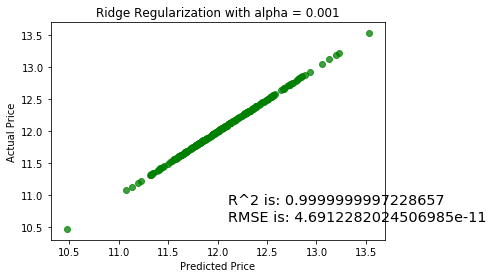

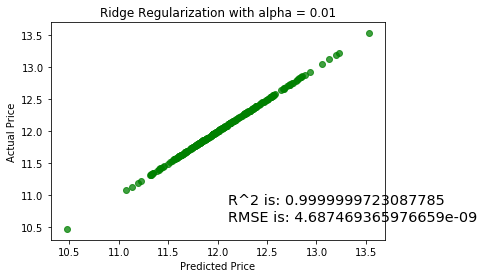

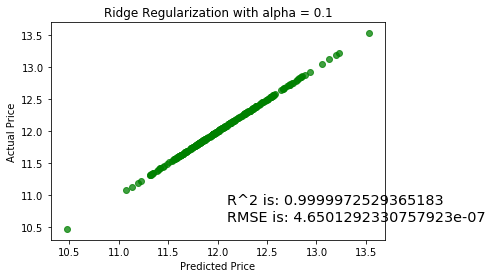

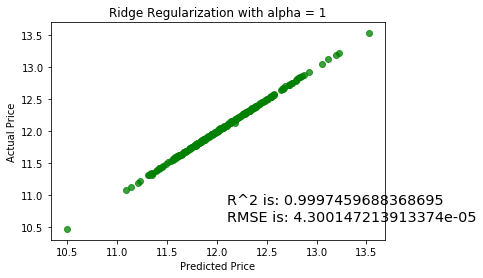

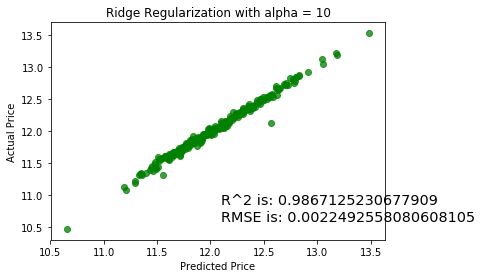

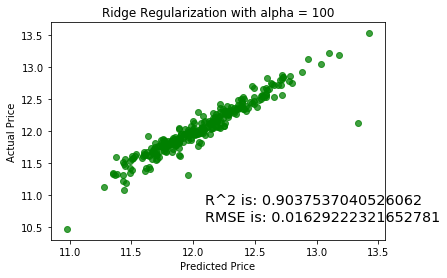

In [165]:
#Regularization pou avoir des estimateurs de régression de ridge(crête)
for i in range (-3, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    plt.scatter(preds_ridge, y_test, alpha=.75, color='g')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(ridge_model.score(X_test, y_test),
                                               mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

### un modèle linéaire régularisé (avec k Folds)

In [166]:
rdgCV = RidgeCV(alphas=[0.01,0.1,1,10,100,1000], cv=5)
rdgCV.fit(X_train,y_train)

RidgeCV(alphas=array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), cv=5,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [30]:
print(rdgCV.alpha_)

0.01


In [31]:
rdg = Ridge(alpha=10)
rdg.fit(X_train, y_train)
rdg.score(X_test, y_test)

0.9530828975181513

In [32]:
y_pred = rdg.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
rmse

0.08374923936092495

### Random forest

In [33]:
rfr = RandomForestRegressor(n_jobs=-1, n_estimators=100)
rfr.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [34]:
rfr.score(X_test,y_test)

0.9999405667902619

In [35]:
y_pred = rfr.predict(X_test)
#rmse  L' écart quadratique-moyenne-racine des données de test
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
rmse

0.0029807796491017327

### Classification

In [36]:
rfr = RandomForestRegressor(n_jobs=-1, n_estimators=100)
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [167]:
y_lr_pred = lr.predict(X_train)
y_rdgCV_pred = rdgCV.predict(X_train)
y_rfr_pred = rfr.predict(X_train)

print('-----training score ---')
print(lr.score(X_train, y_train))
print(rdgCV.score(X_train, y_train))
print(rfr.score(X_train, y_train))
print('----Test score ---')
print(lr.score(X_test, y_test))
print(rdgCV.score(X_test, y_test))
print(rfr.score(X_test, y_test))

-----training score ---
1.0
0.9999999765797599
0.9986427583703144
----Test score ---
1.0
0.9999999723087785
0.9974459586465563


###  <center> <span style="color:#1687a7"> GRAPHIQUE EVOLUE </span> </center>

In [38]:
import scipy.stats as stats

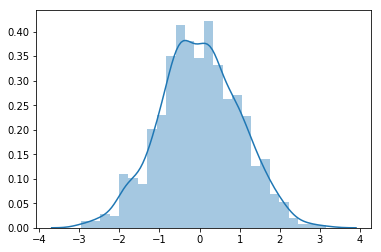

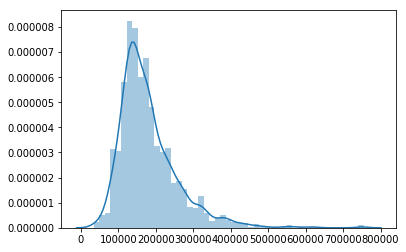

In [168]:
y = train_df['SalePrice'].values
def gra(y):
    gamma, eta, epsilon, lbda = stats.johnsonsu.fit(y)
    yt = gamma + eta*np.arcsinh((y-epsilon)/lbda)
    return yt, gamma, eta, epsilon, lbda

def gra_inverse(y, gamma, eta, epsilon, lbda):
    return lbda*np.sinh((y-gamma)/eta) + epsilon

yt, g, et, ep, l = gra(y)
yt2 = gra_inverse(yt, g, et, ep, l)
plt.figure(1)
sns.distplot(yt)
plt.figure(2)
sns.distplot(yt2)

> Les 30 premières composantes de PCA (Principal component analysis ) expliquent 75% de la variance. Il semble y avoir un certain regroupement présent mais cela ne suffit pas pour une régression segmentée.

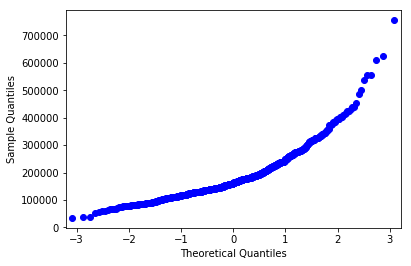

In [51]:
import statsmodels.api as sm
sm.qqplot(y_train)
plt.show()